<a href="https://colab.research.google.com/github/priyankav-27/PRODIGY_ML_02/blob/main/mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
import pandas as pd

In [143]:
# Define the KMeans class
class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Randomly initialize centroids
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False),:]

        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = self._assign_clusters(X)

            # Update centroids
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        return labels

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

In [144]:
from sklearn.cluster import KMeans
import pandas as pd

In [145]:
# Load data from CSV file
file_path = '/content/drive/MyDrive/Mall_Customers.csv'
customer_df = pd.read_csv(file_path)

In [146]:
print(customer_df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [147]:
customer_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [148]:
# Define number of clusters
k = 5

In [149]:
# Normalize the data
customer_data = (customer_data - customer_data.mean(axis=0)) / customer_data.std(axis=0)


In [150]:
# Convert DataFrame to NumPy array
customer_data = customer_df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Initialize number of clusters
k = 5

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=k)
cluster_labels = kmeans.fit(customer_data)

# Print cluster labels
print("Cluster Labels:", cluster_labels)

Cluster Labels: KMeans(n_clusters=5)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [151]:
print(type(cluster_labels))

<class 'sklearn.cluster._kmeans.KMeans'>


In [152]:
from sklearn.cluster import KMeans

# Assuming you have your data loaded into a DataFrame named customer_df

# Select relevant features for clustering
X = customer_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize KMeans model
kmeans = KMeans(n_clusters=5)  # Specify the number of clusters

# Fit the model to the data
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Print cluster labels
print("Cluster Labels:", cluster_labels)


Cluster Labels: [3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 4 0 1 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 1 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


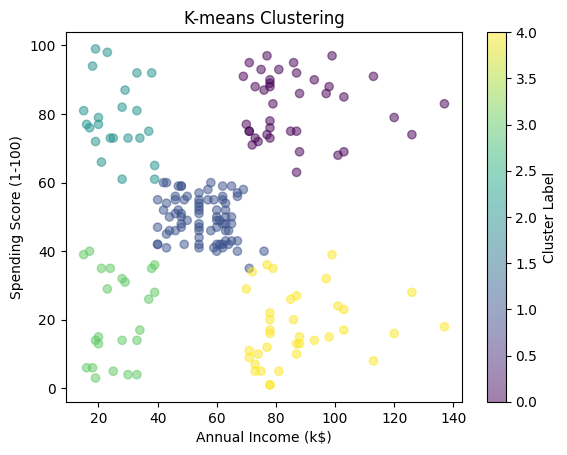

In [153]:
import matplotlib.pyplot as plt

# Plotting the clusters
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster Label')
plt.show()
